# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image

In [2]:
cur_dir='C:\\Users\\subha\\Downloads\\Traffic'

In [3]:
os.listdir(cur_dir)

['Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']

In [4]:
train_path=cur_dir+"\\Train"

In [5]:
 os.listdir(train_path+"\\0")[0]

'00000_00000_00000.png'

In [8]:
from matplotlib.image import imread

# Storing data and labels

In [10]:
data=[]
labels=[]
classes=43

In [11]:
for i in range(classes):
    path=cur_dir + "\\train\\" + str(i)
    images=os.listdir(path)
    for j in images:
        try:
            image=Image.open(path + "\\" + j)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [12]:
data=np.array(data)

In [13]:
labels=np.array(labels)

In [14]:
labels.shape

(39209,)

In [15]:
data.shape

(39209, 30, 30, 3)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)


In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [18]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [19]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test),callbacks=[early_stop])


Epoch 1/20
981/981 [==============================] - 86s 86ms/step - loss: 1.9549 - accuracy: 0.5238 - val_loss: 0.4517 - val_accuracy: 0.8998
Epoch 2/20
981/981 [==============================] - 86s 87ms/step - loss: 0.5997 - accuracy: 0.8244 - val_loss: 0.1990 - val_accuracy: 0.9517
Epoch 3/20
981/981 [==============================] - 84s 86ms/step - loss: 0.4131 - accuracy: 0.8819 - val_loss: 0.1448 - val_accuracy: 0.9610
Epoch 4/20
981/981 [==============================] - 83s 84ms/step - loss: 0.3449 - accuracy: 0.9007 - val_loss: 0.1458 - val_accuracy: 0.9640


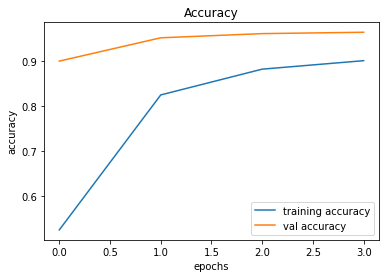

In [24]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

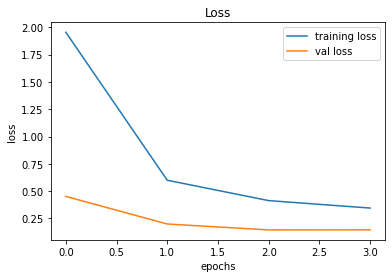

In [25]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
def testing(y_test):
    
    label = y_test["ClassId"].values
    imgs =cur_dir+"\\"+ y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [27]:
y_test = pd.read_csv('Test.csv')
X_test, label = testing(y_test)

In [28]:
Y_pred = np.argmax(model.predict(X_test),axis=1)
Y_pred

395/395 [==============================] - 11s 26ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9322248614410135


In [30]:
model.save("./training/TSR.h5")

In [31]:
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [32]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred =np.argmax(model.predict(X_test),axis=1)
    return image,Y_pred

1/1 [==============================] - 0s 202ms/step
Predicted traffic sign is:  Veh > 3.5 tons prohibited


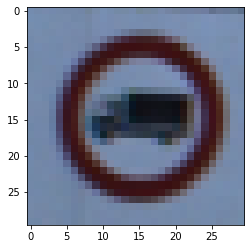

In [34]:
plot,prediction = test_on_img('C:\\Users\\subha\\Downloads\\Traffic\\Test\\00000.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()